# IBM Q Exercise 1: Measurement of 1 qubit
### Written by Anna Liv Paludan Bjerregaard

This exercise will introduce you to the possibilities in IBM Q and at the same time allow you to explore som very cool quantum physics! You will 

1) Produce your first quantum-circuit

2) Measure a qubit 

3) Use operators on this qubit

IBM Q uses the code-language Python. Please, don't worry too much about this, we do not expect you know this in advance. All you need to know to get started is that you press `shift`+`return` to run the code in a given cell - try it out with the cell below which imports the packages we will need for the exercise!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

We start off with a quantum circuit with a single qubit and a measurement device. Run the code below to set up the circit.

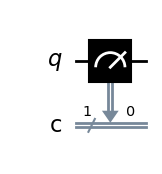

In [2]:
circuit = QuantumCircuit(1,1) #Circuit with one qubit and one classical bit
circuit.measure(0,0) #Measure the first qubit and save the result in the first classical bit
circuit.draw() #Draw a circuit diagram

***How to read the diagram:*** The above diagram is read from left to right. The line "q" indicates a qubit while the "c" line indicates a classical bit. The black box with the gauge is the measurement device - it performs a measurement of the qubit and stores the result in the classical bit.

For a start the qubit is always in the state $|0\rangle$.

**Exercise 1:** Which result do you expect will result from the measurement in this circuit?

Now try to check with an experiment! 

The code below takes this circuit, performs the corresponding experiment and shows the results. The variable `N_measure`determines the number of times the experiment is repeated. The quantity `sim` determines if the experiment will be carried out in a simulator or a real quantum computer! If you set `sim = False` the instructions in the circuit will be send to a real quantum computer somewhere in the world! Note that this may take some time as you may have to wait for your turn - but why not try tonight or during the weekend where the line is typically shorter!

In [3]:
sim = True
N_measure = 200

{'0': 200, '1': 0}


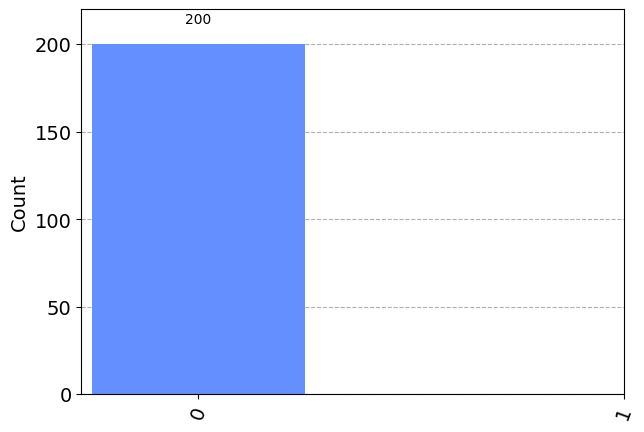

In [4]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as a dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = N_measure
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['0','1']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
#plot_histogram(device_counts).savefig('histogram0.png')
plot_histogram(device_counts)

**Exercise:** The histogram above shows how many times the experiment has given $0$ and $1$. Does the result correspond with your expectations? Do not forget to explain why!

Now we will try also to act with the operator $X$ on our qubit.

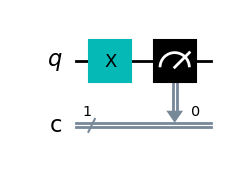

In [5]:
circuitX = QuantumCircuit(1,1)#Circuit with one qubit and one classical bit
circuitX.x(0) #Use the X operator on the first qubit
circuitX.measure(0,0) #Measure the first qubit and save the result in the first classical bit
circuitX.draw() #Draw a circuit diagram

**Exercise:** Explain the above diagram - recall that it is read from left to right!

This circit will set up the qubit in the state $X|0\rangle$. Which result do you expect to obtain if you now perform a measurement on this state?

Check your prediction by running the experiment below!

In [6]:
sim = True
N_measure = 100

{'0': 0, '1': 100}


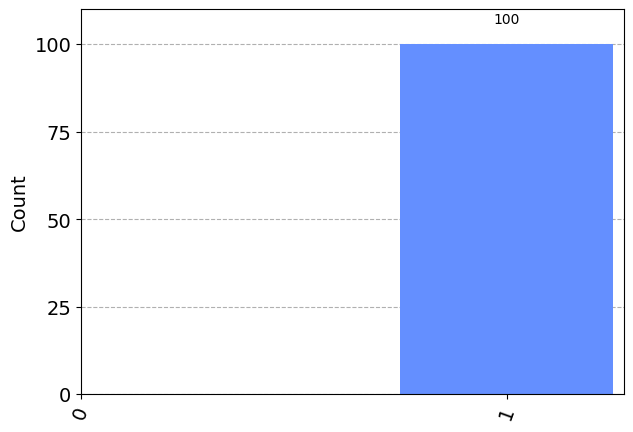

In [7]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitX, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as a dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = N_measure
    transpiled_circ = transpile(circuitX, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['0','1']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

Now let's try with the operator $H$ - which result do you expect?

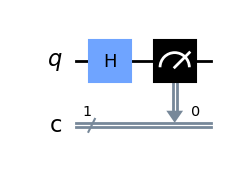

In [8]:
circuitH = QuantumCircuit(1,1) #Circuit with one qubit and one classical bit
circuitH.h(0) #Use the H operator on the first qubit
circuitH.measure(0,0) 
circuitH.draw() 

In [9]:
sim = True
N_measure = 100

{'0': 59, '1': 41}


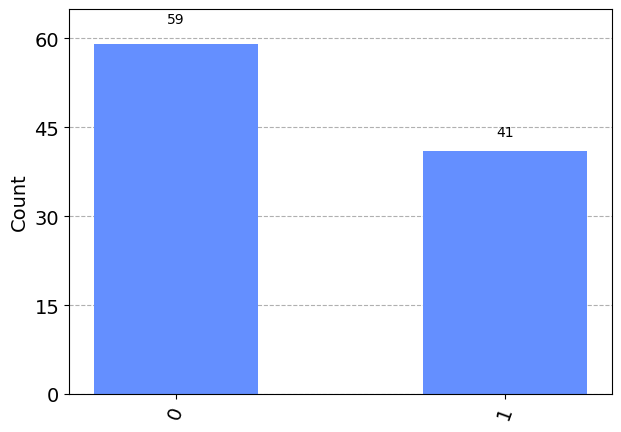

In [10]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitH, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as a dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = N_measure
    transpiled_circ = transpile(circuitH, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['0','1']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)
#plot_histogram(device_counts).savefig('histogramH.png')

**Exercise:** Explain why the histogram above came out this way - does it correspond to your expectations? 

**Exercise:** Try to repeat the experiment a single time instead of 100, by changing N_measure. If you only look at the result of the measurement, what can you say about the state of the system before the measurement? 

**Note** despite the innocent appearence of this experiment it is a very deep point you have just dicovered! 

To round off this single qubit exercise we will try to perform two measurements right after one another. For a start we have the qubit in the state $|0\rangle$ before the measurements. This is set up like this:

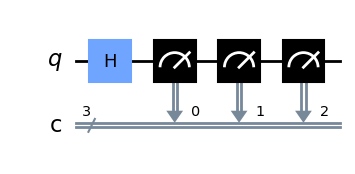

In [11]:
circuitM2 = QuantumCircuit(1,2) 
circuitM2.h(0) 
circuitM2.measure(0,0) #Measure the first qubit and save the result in the first classical bit
circuitM2.measure(0,1) #Measure the first qubit and save the result in the second classical bit
circuitM2.draw() 

{'000': 43, '111': 57}


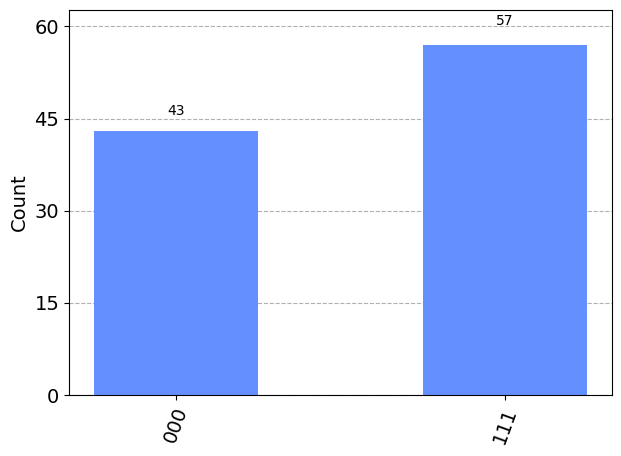

In [12]:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitM2, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as a dictionary object

print(device_counts)
plot_histogram(device_counts)
#plot_histogram(device_counts).savefig('histogramH.png')

**How to read the result:** If the result is say, 11, it implies that the first measurement yielded 1 and so did the second measurement. Suppose the result instead was say, 01, this means that the first measurement gave 1 and the second gave 0. (Note that the first measurement is the one furthest to the right.) 

**Exercise:** Try to explain the result. Try also to change the experiment such that the qubit is in the state $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ before the two measurements. Again try to explain the result. 

**Note** there is again a very deep point in this still quite innocent appearing experiment.

**Exercise:** Try to set up a few experiments of your own. You could for instance try to insert an operator between the two measuremets, or insert more operators before a single measurement, it is all up to you! 

This exercise has given you a chance to learn a handful of things concerning qubits, operators and measurements - now you should be ready to move on and study operators which acts on more than one qubit at a time and entanglement!

**Ekstra exercise:** What would happen if we produced the state $ZH|0\rangle$? Which result of the measurement would you expect? Check your prediction below!

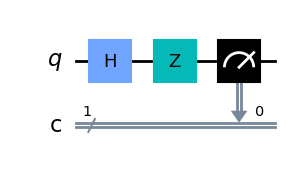

In [13]:
circuitZH = QuantumCircuit(1,1) 
circuitZH.h(0) 
circuitZH.z(0) #Use the Z operator on the first qubit
circuitZH.measure(0,0) 
circuitZH.draw() 

In [14]:
sim = True
N_measure = 100

{'0': 45, '1': 55}


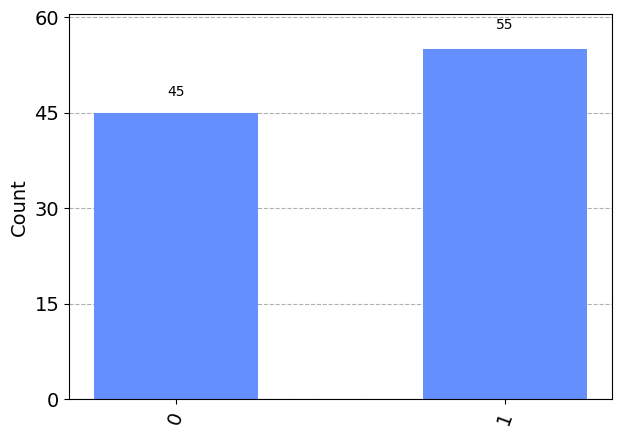

In [15]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitZH, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = N_measure
    transpiled_circ = transpile(circuitZH, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['0','1']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)